<a href="https://colab.research.google.com/github/divyaparadkar/Ml_Traning/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.model_selection import train_test_split


In [5]:
churn_data=pd.read_csv("/content/customer_churn (1).csv")


In [6]:
churn_data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
churn_data.drop("customerID",axis=1, inplace=True)


In [10]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
churn_data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
churn_data["TotalCharges"] = pd.to_numeric(churn_data["TotalCharges"])


ValueError: Unable to parse string " " at position 488

In [13]:
churn_data[churn_data["TotalCharges"]==" "].shape

(11, 20)

In [14]:


#churn_data["TotalCharges"]=churn_data["TotalCharges"].replace(" ",11)


In [15]:
churn_data1=churn_data[churn_data["TotalCharges"]!=" "]

In [16]:
churn_data.shape, churn_data1.shape

((7043, 20), (7032, 20))

In [17]:
churn_data1.TotalCharges=churn_data.TotalCharges

<ipython-input-17-f26625b3d789>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1.TotalCharges=churn_data.TotalCharges


In [18]:
type(churn_data["TotalCharges"]),type(churn_data1.shape)

(pandas.core.series.Series, tuple)

In [19]:
churn_data1.TotalCharges=pd.to_numeric(churn_data1.TotalCharges)

<ipython-input-19-c7959c594abc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1.TotalCharges=pd.to_numeric(churn_data1.TotalCharges)


In [20]:
churn_data1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [21]:
churn_data1.values

array([['Female', 0, 'Yes', ..., 29.85, 29.85, 'No'],
       ['Male', 0, 'No', ..., 56.95, 1889.5, 'No'],
       ['Male', 0, 'No', ..., 53.85, 108.15, 'Yes'],
       ...,
       ['Female', 0, 'Yes', ..., 29.6, 346.45, 'No'],
       ['Male', 1, 'Yes', ..., 74.4, 306.6, 'Yes'],
       ['Male', 0, 'No', ..., 105.65, 6844.5, 'No']], dtype=object)

In [22]:
churn_data1.dtypes
#churn_data1.Churn.value

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
churn_data1[churn_data1.Churn=="Yes"].shape

(1869, 20)

In [24]:
churn_data1[churn_data1.Churn=="No"].shape

(5163, 20)

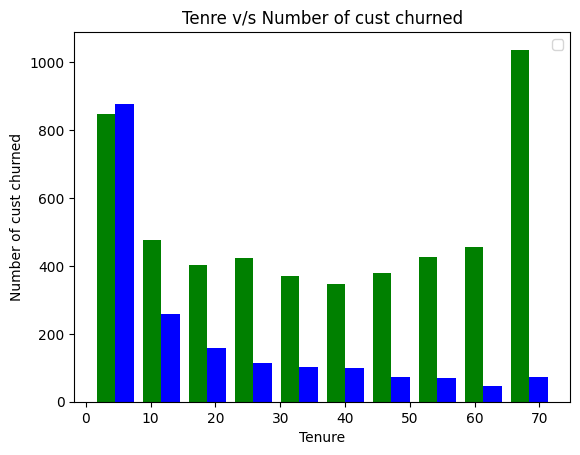

In [25]:
tenure_churn_no=churn_data1[churn_data1.Churn=="No"].tenure
tenure_churn_yes=churn_data1[churn_data1.Churn=="Yes"].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of cust churned")
plt.title("Tenre v/s Number of cust churned")

plt.hist([tenure_churn_no, tenure_churn_yes],color=["green","blue"])
plt.legend()

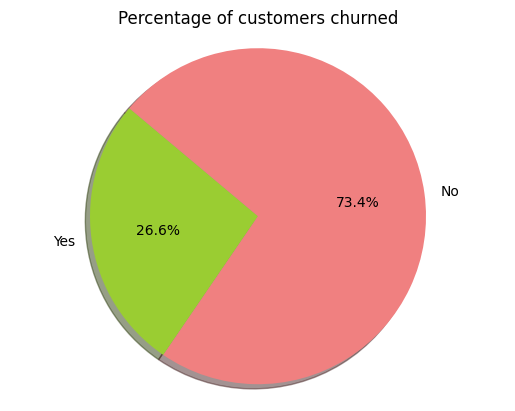

In [26]:
# prompt: make pie chart

labels = 'Yes', 'No'
sizes = [churn_data1[churn_data1.Churn=="Yes"].shape[0], churn_data1[churn_data1.Churn=="No"].shape[0]]
colors = ['yellowgreen', 'lightcoral']
explode = (0.1, 0)  # only "explode" the first slice (i.e. 'Yes')

plt.pie(sizes,  labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Percentage of customers churned')
plt.show()


In [27]:
# monthlycharges
churn_data2=churn_data[churn_data["MonthlyCharges"]!=" "]

In [28]:
churn_data.shape, churn_data2.shape

((7043, 20), (7043, 20))

In [29]:
churn_data2.MonthlyCharges=churn_data.MonthlyCharges

In [30]:
type(churn_data["MonthlyCharges"]),type(churn_data2.shape)

(pandas.core.series.Series, tuple)

In [31]:
churn_data2.MonthlyCharges=pd.to_numeric(churn_data2.MonthlyCharges)

In [ ]:
churn_data2.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [32]:
churn_data2.values


array([['Female', 0, 'Yes', ..., 29.85, '29.85', 'No'],
       ['Male', 0, 'No', ..., 56.95, '1889.5', 'No'],
       ['Male', 0, 'No', ..., 53.85, '108.15', 'Yes'],
       ...,
       ['Female', 0, 'Yes', ..., 29.6, '346.45', 'No'],
       ['Male', 1, 'Yes', ..., 74.4, '306.6', 'Yes'],
       ['Male', 0, 'No', ..., 105.65, '6844.5', 'No']], dtype=object)

In [33]:
churn_data2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

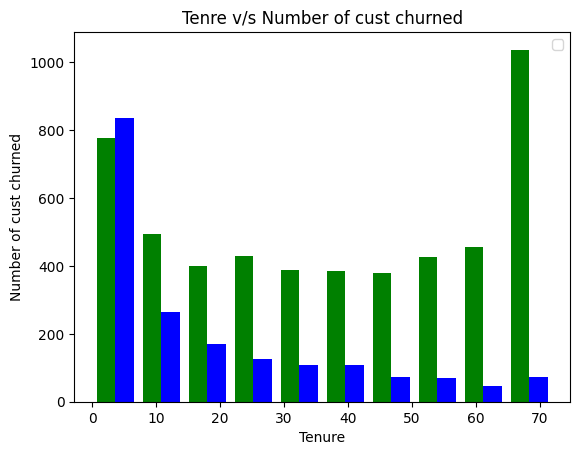

In [34]:
tenure_churn_no=churn_data2[churn_data2.Churn=="No"].tenure
tenure_churn_yes=churn_data2[churn_data2.Churn=="Yes"].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of cust churned")
plt.title("Tenre v/s Number of cust churned")

plt.hist([tenure_churn_no, tenure_churn_yes],color=["green","blue"])
plt.legend()

In [35]:
#encoding

In [40]:
# prompt: using encoding in this code

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
churn_data2['gender']=le.fit_transform(churn_data2['gender'])
churn_data2['Partner']=le.fit_transform(churn_data2['Partner'])
churn_data2['Dependents']=le.fit_transform(churn_data2['Dependents'])
churn_data2['PhoneService']=le.fit_transform(churn_data2['PhoneService'])
churn_data2['MultipleLines']=le.fit_transform(churn_data2['MultipleLines'])
churn_data2['OnlineSecurity']=le.fit_transform(churn_data2['OnlineSecurity'])
churn_data2['OnlineBackup']=le.fit_transform(churn_data2['OnlineBackup'])
churn_data2['DeviceProtection']=le.fit_transform(churn_data2['DeviceProtection'])

churn_data2


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,DSL,0,2,0,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,0,DSL,2,0,2,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,0,DSL,2,2,0,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,1,DSL,2,0,2,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,DSL,2,0,2,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,0,0,1,1,72,1,2,Fiber optic,0,2,2,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,0,0,1,1,11,0,1,DSL,2,0,0,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,1,1,0,4,1,2,Fiber optic,0,0,0,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [41]:
def col_unique_value(d):
  for col in d:
    print(col,":",d[col].unique())

In [42]:
col_unique_value(churn_data1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [43]:
churn_data1.replace("No phone service","No",inplace=True)
churn_data1.replace("No internet service","No",inplace=True)

col_unique_value(churn_data1)



gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


<ipython-input-43-2d336b6439ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1.replace("No phone service","No",inplace=True)
<ipython-input-43-2d336b6439ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1.replace("No internet service","No",inplace=True)


In [ ]:
yes_no_col=["SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity" ,"OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]
for i in yes_no_col:
  churn_data1[i].replace({"Yes":1,"No":0},inplace=True)


In [45]:
churn_data1["gender"].replace({"Female":1,"Male":0},inplace=True)

<ipython-input-45-580d766e17a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1["gender"].replace({"Female":1,"Male":0},inplace=True)


In [46]:
col_unique_value(churn_data1)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [47]:
churn_data_pro=pd.get_dummies(data=churn_data1,columns=["InternetService","Contract","PaymentMethod"])

In [48]:
churn_data_pro

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [49]:
col_unique_value(churn_data_pro)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [50]:
col_to_scale=["tenure","MonthlyCharges","TotalCharges",]
scaler= MinMaxScaler()
churn_data_pro[col_to_scale]=scaler.fit_transform(churn_data_pro[col_to_scale])

In [51]:
X=churn_data_pro.drop("Churn",axis="columns")
y=churn_data_pro["Churn"]

In [53]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [54]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))